In [3]:
# pip install
#!pip install -r requirements.txt

# Imports
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from pprint import pprint

# Module imports
from periodic_table import *
from utils import *
print("Imported all.")

Imported all.


In [4]:
# Open data file
file_dir = "./assets/FTFP/A_Z_vol_count-all.txt"
columns = ["Mass Number", "Atomic Number", "Detector Volume", "Counts"]
df = open_data(file_dir, columns)

In [5]:
# Add in isotope data
add_isotope_data(df)
# Reorder columns
df = df[["Iso Symbol","Atomic Number","Mass Number","Counts", "Detector Volume","Production Yield","Stable","Half Life (ns)","Decay Modes (m, b, q MeV)","Max Q-Value","Plot Colour",]]

# Add Production (/yr)

In [6]:
# Simulation length = years * nanoseconds
year_in_nano = (3.154 * 10**16)
year_in_sec = (3.154 * 10**7)
sim_length = 29.01
df["Production (/yr)"] = df["Counts"] / sim_length

# Add count per muon

In [7]:
# number of muons per year
muon_no = (3.447 * 10**6)
df["Count per Muon"] = df["Production (/yr)"] / muon_no
# Normalise
df["Count per Muon"] = (df["Count per Muon"] - df["Count per Muon"].min()) / (df["Count per Muon"].max() - df["Count per Muon"].min())

# Clean unstable isotopes into two datasets

In [8]:
df_unstable = df[df["Stable"] == False]
df_unstable = df_unstable.reset_index()
df_stable = df[df["Stable"] == True]
df_stable = df_stable.reset_index()
print(f"Number of stable isotopes: {len(df) - len(df_unstable)}")
print(f"Number of unstable isotopes: {len(df_unstable)}")
#df_unstable, df_stable

Number of stable isotopes: 126
Number of unstable isotopes: 402


In [13]:
# Data analysis
print(f"Total average production yield per muon: {round(df['Count per Muon'].mean(), 5)}")
print(f"Unstable average production yield per muon: {round(df_unstable['Count per Muon'].mean(), 5)}")
print(f"Stable average production yield per muon: {round(df_stable['Count per Muon'].mean(), 5)}")

Total average production yield per muon: 0.00478
Unstable Average production yield per muon: 0.00024
Stable Average production yield per muon: 0.01929


# Plot All

In [59]:
# Check for Tritium
df.sort_values("Atomic Number").head(30)

,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr)
0,H 1-4,1,4,849,7,2.925093e-06,False,0.000000e+00,"[[N, 1.0, 2.88]]",2.880,red,29.2658
1,H 1-4,1,4,580,9,1.998297e-06,False,0.000000e+00,"[[N, 1.0, 2.88]]",2.880,red,19.9931
2,H 1-4,1,4,713,11,2.456527e-06,False,0.000000e+00,"[[N, 1.0, 2.88]]",2.880,red,24.5777
6,H 1-5,1,5,3,7,1.033602e-08,False,8.330000e-23,"[[2N, 1.0, 1.8]]",1.800,red,0.103413
7,H 1-5,1,5,3,9,1.033602e-08,False,8.330000e-23,"[[2N, 1.0, 1.8]]",1.800,red,0.103413
8,H 1-5,1,5,5,11,1.722670e-08,False,8.330000e-23,"[[2N, 1.0, 1.8]]",1.800,red,0.172354
15,H 1-6,1,6,3,7,1.033602e-08,False,2.970000e-22,"[[N, 1.0, 0.9]]",0.900,red,0.103413
16,H 1-6,1,6,3,9,1.033602e-08,False,2.970000e-22,"[[N, 1.0, 0.9]]",0.900,red,0.103413
17,H 1-6,1,6,5,11,1.722670e-08,False,2.970000e-22,"[[N, 1.0, 0.9]]",0.900,red,0.172354
52,He 2-9,2,9,1,11,3.445340e-09,False,0.000000e+00,"[[N, 1.0, 1.27]]",1.270,red,0.0344709


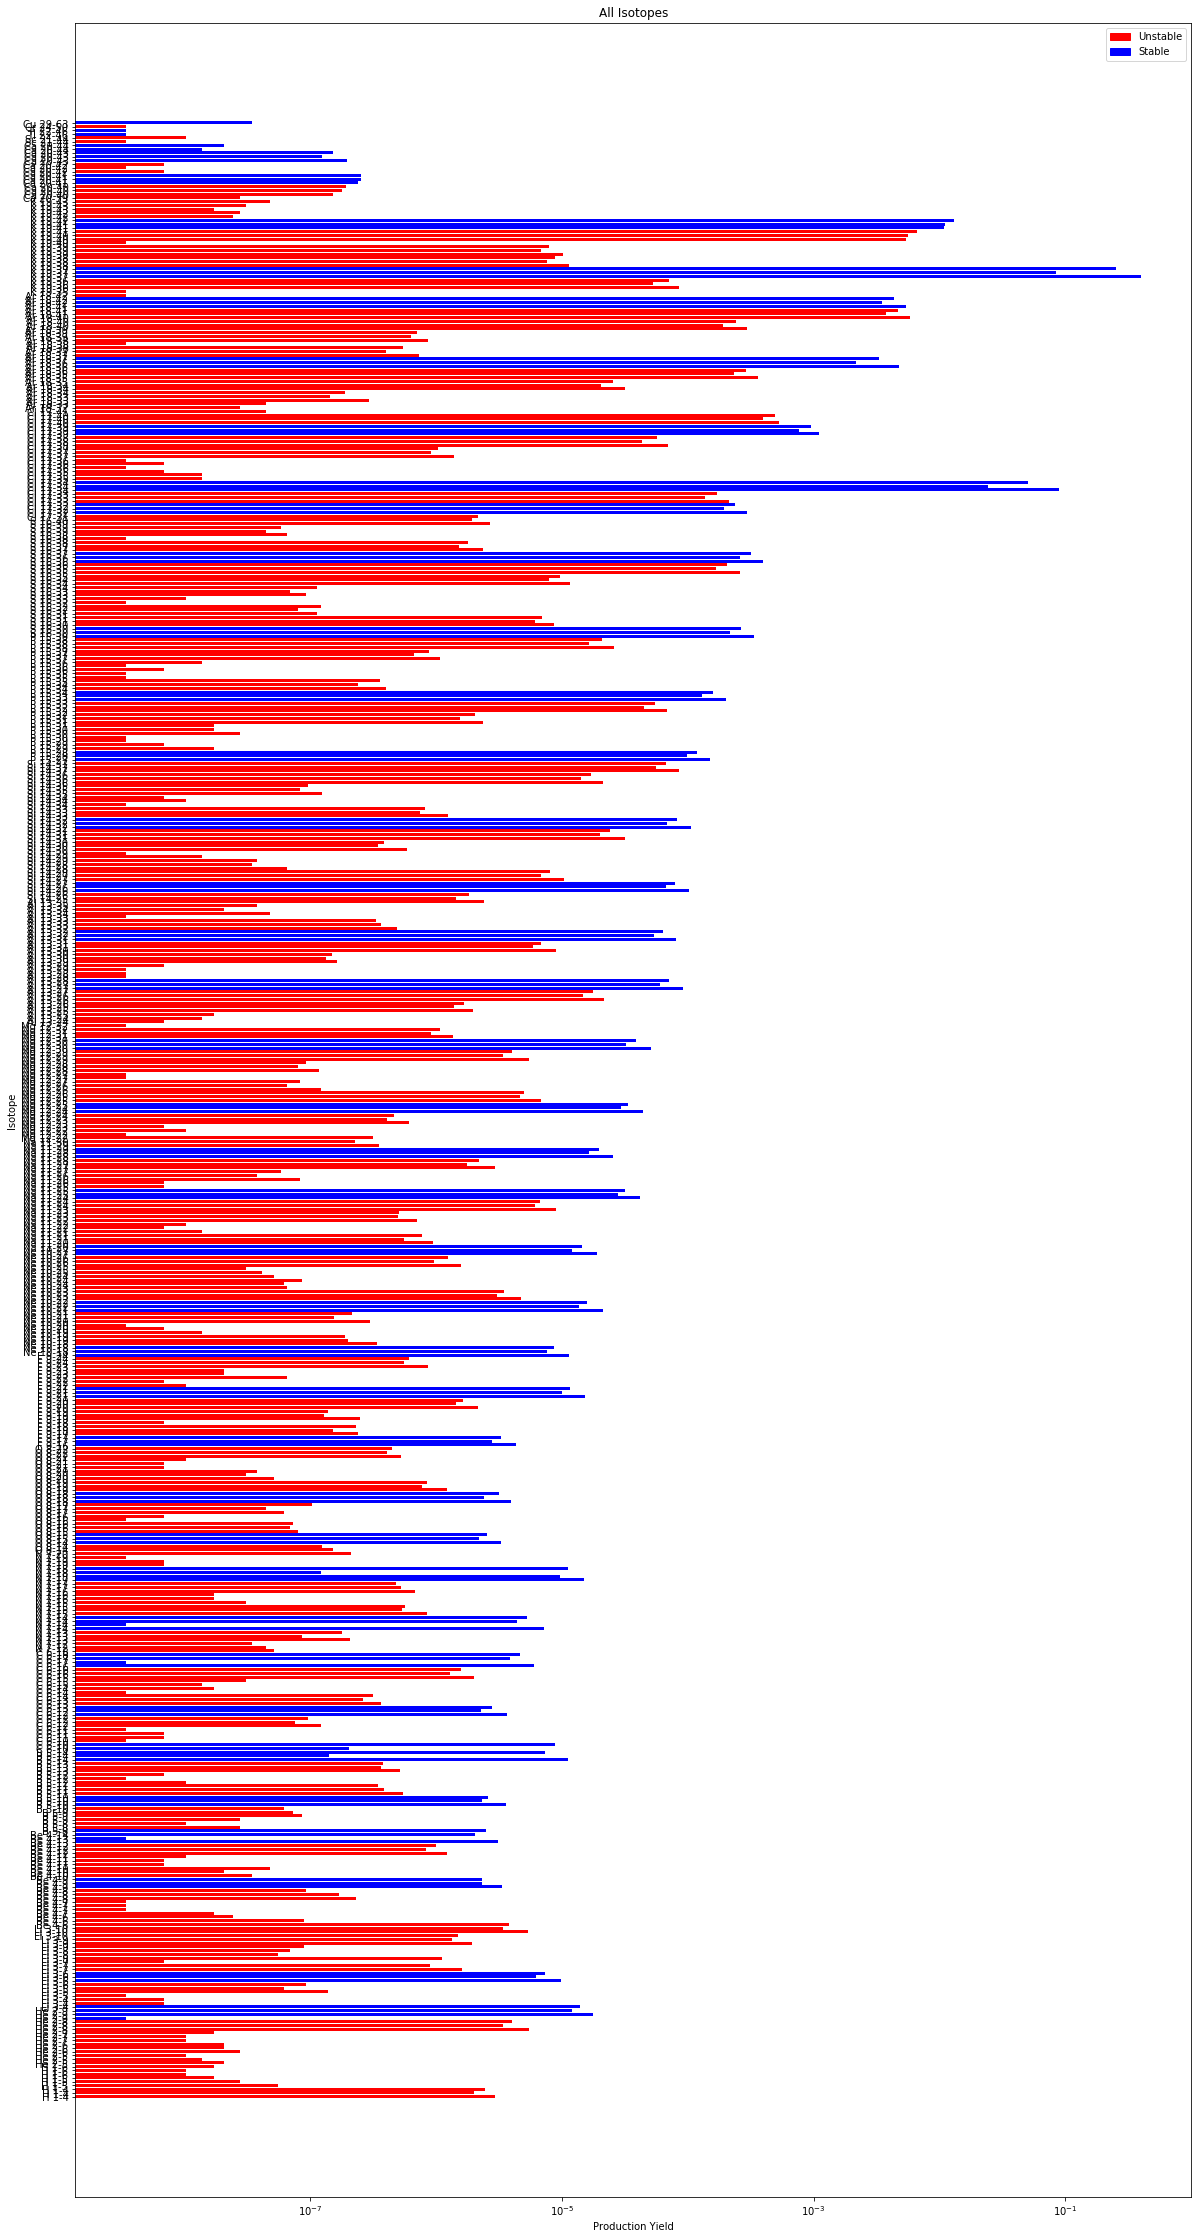

In [47]:
# Plot total
figsize=(20,40)
# Plotting
fig, ax = plt.subplots(figsize=figsize)
ax.barh(df.index, df["Production Yield"], log=True, color=df["Plot Colour"])
ax.set_yticklabels(df["Iso Symbol"])
ax.set_yticks(np.arange(len(df)))
ax.set_xlabel("Production Yield")
ax.set_ylabel("Isotope")
ax.set_title("All Isotopes")
red_patch = mpatches.Patch(color="red", label="Unstable")
blue_patch = mpatches.Patch(color="blue", label="Stable")
ax.legend(handles=[red_patch, blue_patch], loc=0)
plt.show()

# Plot unstable

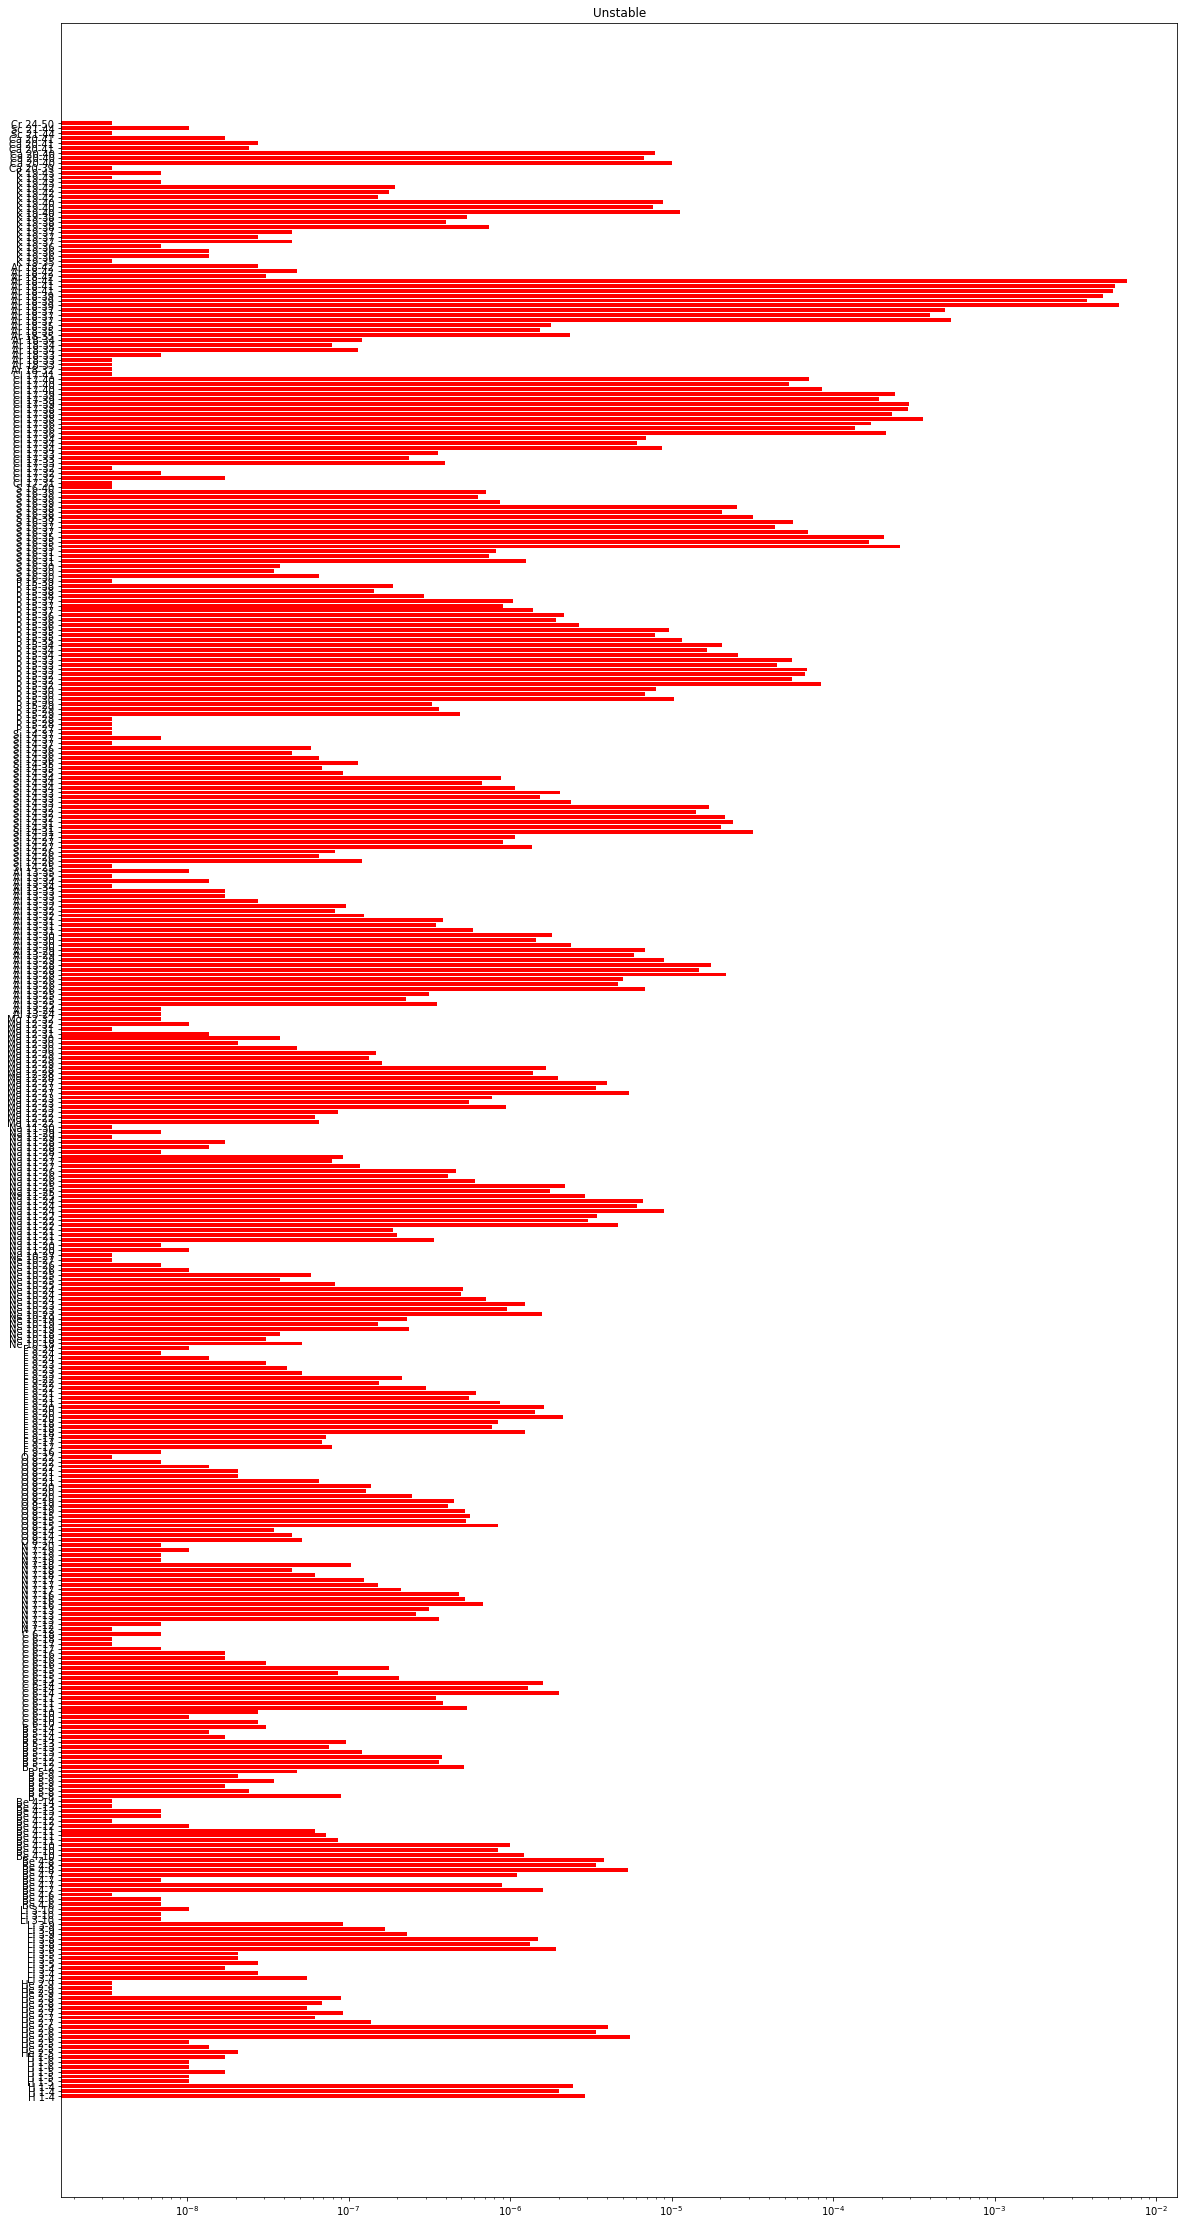

In [48]:
fig_un, ax_un = plt.subplots(figsize=figsize)
ax_un.barh(df_unstable.index, df_unstable["Production Yield"], log=True, color=df_unstable["Plot Colour"])
ax_un.set_yticklabels(df_unstable["Iso Symbol"])
ax_un.set_yticks(np.arange(len(df_unstable)))
ax.set_xlabel("Production Yield")
ax.set_ylabel("Isotope")
ax_un.set_title("Unstable")
plt.show()

# Plot stable

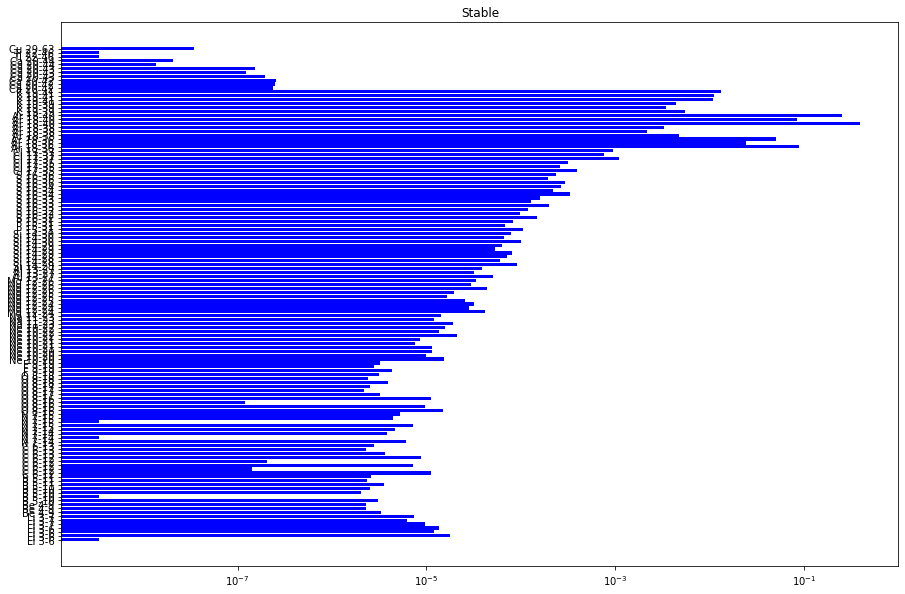

In [49]:
fig_s, ax_s = plt.subplots(figsize=(15,10))
ax_s.barh(df_stable.index, df_stable["Production Yield"], log=True, color=df_stable["Plot Colour"])
ax_s.set_yticklabels(df_stable["Iso Symbol"])
ax_s.set_yticks(np.arange(len(df_stable)))
ax.set_xlabel("Production Yield")
ax.set_ylabel("Isotope")
ax_s.set_title("Stable")
plt.show()

# Ratio of counts in each volume
key: 7, 9, 11

val: Outer, Inner, TPC

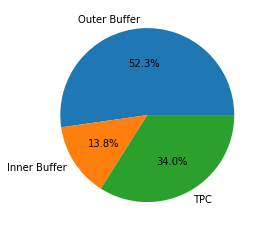

In [50]:
df_OB = df[df["Detector Volume"] == 7]
df_IB = df[df["Detector Volume"] == 9]
df_TPC = df[df["Detector Volume"] == 11]
plt.pie(x=[df_OB["Counts"].sum(), df_IB["Counts"].sum(), df_TPC["Counts"].sum()], autopct='%1.1f%%', labels=["Outer Buffer", "Inner Buffer", "TPC"])
plt.show()

# Looking for excess yields

In [51]:
# Sort df by counts
df_count_sort = df.sort_values(["Counts"], ascending=False)
# Try to highlight mass numbers > 40
# df_count_sort.style.apply(lambda x: ["background-color: red" if x["Mass Number"] > 40 else ""], axis = 1)
# Total df
df_count_sort.head(60)

,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr)
486,Ar 18-40,18,40,114943991,7,0.396021,True,inf,None,NaN,blue,3.96222e+06
488,Ar 18-40,18,40,73513413,11,0.253279,True,inf,None,NaN,blue,2.53407e+06
429,Ar 18-36,18,36,25779517,7,0.088819,True,inf,None,NaN,blue,888642
487,Ar 18-40,18,40,24342254,9,0.083867,True,inf,None,NaN,blue,839099
431,Ar 18-36,18,36,14500233,11,0.049958,True,inf,None,NaN,blue,499836
430,Ar 18-36,18,36,7023578,9,0.024199,True,inf,None,NaN,blue,242109
501,K 19-41,19,41,3793765,11,0.013071,True,inf,None,NaN,blue,130774
500,K 19-41,19,41,3227401,9,0.011119,True,inf,None,NaN,blue,111251
499,K 19-41,19,41,3139455,7,0.010816,True,inf,None,NaN,blue,108220
498,Ar 18-41,18,41,1904199,11,0.006561,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,65639.4


### Unstable (Counts)
To get a sense of most produced isotopes

In [52]:
# Unstable df sorted by counts
df_count_sort[df_count_sort["Stable"] == False].head(60)

,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr)
498,Ar 18-41,18,41,1904199,11,0.006561,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,65639.4
475,Ar 18-39,18,39,1695066,7,0.005840,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,58430.4
497,Ar 18-41,18,41,1619848,9,0.005581,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,55837.6
496,Ar 18-41,18,41,1575590,7,0.005428,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,54312
477,Ar 18-39,18,39,1365362,11,0.004704,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,47065.2
476,Ar 18-39,18,39,1086982,9,0.003745,False,8.490000e+09,"[[B-, 1.0, 0.565]]",0.565,red,37469.2
447,Ar 18-37,18,37,154841,7,0.000533,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,5337.5
449,Ar 18-37,18,37,142467,11,0.000491,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,4910.96
448,Ar 18-37,18,37,115054,9,0.000396,False,3.030000e+06,"[[EC, 1.0, 0.814]]",0.814,red,3966.01
459,Cl 17-38,17,38,104823,7,0.000361,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,3613.34


### Unstable all (heavy (40>))
Any heavy isotopes that may decay

In [53]:
df_unstable[(df_unstable['Mass Number'] > 40)]

,index,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr)
350,495,Cl 17-41,17,41,1,7,3.445340e-09,False,3.840000e+01,"[[B-, 1.0, 5.76]]",5.760,red,0.0344709
367,496,Ar 18-41,18,41,1575590,7,5.428443e-03,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,54312
368,497,Ar 18-41,18,41,1619848,9,5.580926e-03,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,55837.6
369,498,Ar 18-41,18,41,1904199,11,6.560612e-03,False,6.580000e+03,"[[B-, 1.0, 2.492]]",2.492,red,65639.4
370,505,Ar 18-42,18,42,9,7,3.100806e-08,False,1.040000e+09,"[[B-, 1.0, 0.599]]",0.599,red,0.310238
371,506,Ar 18-42,18,42,14,9,4.823475e-08,False,1.040000e+09,"[[B-, 1.0, 0.599]]",0.599,red,0.482592
372,507,Ar 18-42,18,42,8,11,2.756272e-08,False,1.040000e+09,"[[B-, 1.0, 0.599]]",0.599,red,0.275767
386,508,K 19-42,19,42,44,7,1.515949e-07,False,4.440000e+04,"[[B-, 1.0, 3.526]]",3.526,red,1.51672
387,509,K 19-42,19,42,52,9,1.791577e-07,False,4.440000e+04,"[[B-, 1.0, 3.526]]",3.526,red,1.79249
388,510,K 19-42,19,42,56,11,1.929390e-07,False,4.440000e+04,"[[B-, 1.0, 3.526]]",3.526,red,1.93037


### Unstable all (Half-life)

In [54]:
df_unstable_sort_life = df_unstable.sort_values("Half Life (ns)", ascending=False)
df_unstable_sort_life.head(60)

,index,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr)
395,494,Ca 20-40,20,40,2303,11,7.934617e-06,False,9.470000e+28,"[[2EC, None, 0.0]]",NaN,red,79.3864
393,492,Ca 20-40,20,40,2939,7,1.012585e-05,False,9.470000e+28,"[[2EC, None, 0.0]]",NaN,red,101.31
394,493,Ca 20-40,20,40,1962,9,6.759756e-06,False,9.470000e+28,"[[2EC, None, 0.0]]",NaN,red,67.6319
401,526,Cr 24-50,24,50,1,6,3.445340e-09,False,4.100000e+25,"[[2EC, None, 0.0]]",NaN,red,0.0344709
384,490,K 19-40,19,40,2212,9,7.621091e-06,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,76.2496
385,491,K 19-40,19,40,2575,11,8.871749e-06,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,88.7625
383,489,K 19-40,19,40,3277,7,1.129038e-05,False,3.940000e+16,"[[B-, 0.8928, 1.311], [EC, 0.1072, 1.505]]",1.505,red,112.961
49,65,Be 4-10,4,10,352,7,1.212760e-06,False,4.380000e+13,"[[B-, 1.0, 0.556]]",0.556,red,12.1337
50,66,Be 4-10,4,10,243,9,8.372175e-07,False,4.380000e+13,"[[B-, 1.0, 0.556]]",0.556,red,8.37642
51,67,Be 4-10,4,10,289,11,9.957031e-07,False,4.380000e+13,"[[B-, 1.0, 0.556]]",0.556,red,9.96208


# Looking at production yields

### Unstable (Production yield > 0.1%)

In [55]:
# Sets min production yield to be 1%
high_prod_yield = df_unstable[(df_unstable["Production Yield"] > 0.0001)]
high_prod_yield

,index,Iso Symbol,Atomic Number,Mass Number,Counts,Detector Volume,Production Yield,Stable,Half Life (ns),"Decay Modes (m, b, q MeV)",Max Q-Value,Plot Colour,Production (/yr)
315,407,S 16-35,16,35,75036,7,0.000259,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,2586.56
316,408,S 16-35,16,35,48395,9,0.000167,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,1668.22
317,409,S 16-35,16,35,59878,11,0.000206,False,7.550000e+06,"[[B-, 1.0, 0.167]]",0.167,red,2064.05
338,426,Cl 17-36,17,36,62018,7,0.000214,False,9.500000e+12,"[[B-, 0.981, 0.71], [EC, 0.019, 0.71]]",0.710,red,2137.81
339,427,Cl 17-36,17,36,39758,9,0.000137,False,9.500000e+12,"[[B-, 0.981, 0.71], [EC, 0.019, 0.71]]",0.710,red,1370.49
340,428,Cl 17-36,17,36,49549,11,0.000171,False,9.500000e+12,"[[B-, 0.981, 0.71], [EC, 0.019, 0.71]]",0.710,red,1708
341,459,Cl 17-38,17,38,104823,7,0.000361,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,3613.34
342,460,Cl 17-38,17,38,67509,9,0.000233,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,2327.09
343,461,Cl 17-38,17,38,83897,11,0.000289,False,2.230000e+03,"[[B-, 1.0, 4.916]]",4.916,red,2892
344,472,Cl 17-39,17,39,85930,7,0.000296,False,3.370000e+03,"[[B-, 1.0, 3.442]]",3.442,red,2962.08
